This documents contains the code for simulating the minimal model. The minimal model contains only SigV activating its own production. This simple self activation loop is able to recreaet the heterogeneous activation. However, due to the absence of RsiV it cannot be compared to the various mutants modulating RsiV production. In addition, it has a diminished memory feature. 

# Preparations

### Fetch Packages

In [3]:
using DiffEqBase
using DiffEqJump
using Plots
using Plots.Measures
using Serialization
gr(); default(fmt = :png);

In [22]:
include("Functions/simulate.jl")
include("Functions/make_plots.jl");
include("Functions/make_csvs.jl");     # This file contains the function for re-saving simulations as csv files (if one wishes to access them from other programming langauges).

### Declare the Model

In [5]:
# Declares the minimal model.
function rate1_minimal(u,p,t)
    σ = u[1]
    v0,L,v,K,n,deg = p
    return v0 + (v*(L*σ)^n)/((L*σ)^n+K^n)
end
function affect1_minimal!(integrator)
  integrator.u[1] += 1
end
jump1_minimal = ConstantRateJump(rate1_minimal,affect1_minimal!)
function rate2_minimal(u,p,t)
    σ = u[1]
    v0,L,v,K,n,deg = p
    return deg*σ
end
function affect2_minimal!(integrator)
  integrator.u[1] -= 1
end
jump2_minimal = ConstantRateJump(rate2_minimal,affect2_minimal!)

jumps_minimal = [jump1_minimal, jump2_minimal];

### Sets File Destination

In [6]:
# Sets folder where the simulations are saved.
data_folder = "../Data/";

In [7]:
# Sets folder where the figures are saved.
figure_folder = "../Figures/";

### Set Parameters

In [8]:
v0 = 0.1; v = 2.5; K = 75.; n = 2;
deg = 0.01; L = 0.;
p = [v0, L, v, K, n, deg];

# Analysis

In [9]:
m = 100;
l = 4000.;

In [10]:
# Simulates the activation of the minimal model.
@time sols_heterogeneous_activation = ssa_monte_p_steps(p,(-500.,l-500.),m,((2,0.,1.),),jumps=jumps_minimal);

 11.706307 seconds (7.41 M allocations: 430.063 MiB, 4.64% gc time)


In [11]:
# Saves the simulations to file.
serialize(data_folder*"minimal_model/sols_heterogeneous_activation.jls",sols_heterogeneous_activation)

In [12]:
# Loads the simulations from file (can be skipped if one simulated in this session).
sols_heterogeneous_activation = deserialize(data_folder*"minimal_model/sols_heterogeneous_activation.jls");

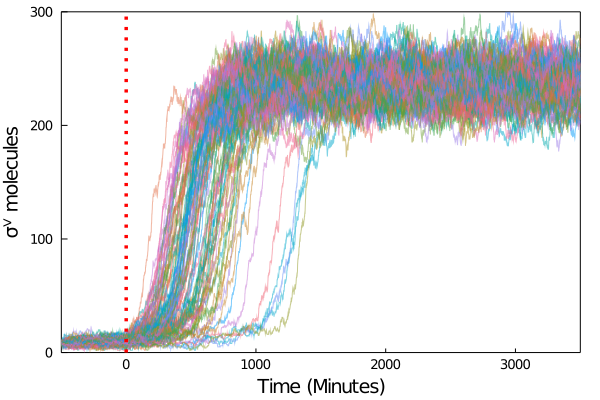

In [13]:
# Plots the heterogeneous activation of the minimal model.
plot_sims(sols_heterogeneous_activation,ylimit=(0,300))
plot_heterogeneous_activation = plot_stress_pattern!([0],[],300)

In [14]:
# Saves the figure.
savefig(plot_heterogeneous_activation,figure_folder*"minimal_model/main_figure.png"); savefig(plot_heterogeneous_activation,figure_folder*"main_figure.svg"); 

# Save Simulats as CSV

Since csv files can be more commonly read outside of the julia programming language, this section simply loads the simulation files, and re-saves them as csv files. The script only saves the value of the SigV variable, but this can be changed to either saving the RsiV or the SigV-RsiV variable. The csv saving function loads the target julia file from the data folder, and then resave it as csv (does not need to be in memory).

The csv files are structured as follow. Each csv file corresponds to one monte-carlo simulation from a model (all simulations drawn from the same distribution). The first line contains all of the time points. Then follows one line for each simulation (typically 100). The line contains comma-separated values with the amount of the component at that time point (the component is determined by which components are saved using the "vars" option, files have an appended "_SigV",  "_RsiV", or "_SigVRsiV", denoting which component int contains. 

In [15]:
# Selects which variable we wishes to save (and how we wish to change the file name correspondingly).
vars = [1];    # Selects for which variable we wishes to create csv files. 1 corresponds to SigV, 2 to RsiV, and 3 to SigV-RsiV. The vector can have several (e.g. for "vars = [1,2]" we would create files for both SigV and RsiV).

1-element Array{Int64,1}:
 1

In [23]:
resave_as_cvs(data_folder*"minimal_model/","sols_heterogeneous_activation",vars=vars)